In [40]:
import pandas as pd
import csv
import os
import tensorflow as tf
import keras
from sklearn.preprocessing import normalize, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import urllib
from sklearn.metrics import accuracy_score


List of gestures used

In [41]:
gestures = ['down_to_up', 'forward_clockwise', 'left_fall', 'up_clockwise', 'up_anticlockwise', 'left_to_right', 'right_to_left', 'forward_fall']

In [42]:
df = pd.read_csv('gesture60_8_.csv')

In [43]:
# df.describe()

Normalize and shuffle

In [44]:
df[df.columns[:-1]] = normalize(df[df.columns[:-1]])
df = df.sample(frac=1, random_state=13).reset_index(drop = True)
df

,1,2,3,4,5,6,7,8,9,10,...,592,593,594,595,596,597,598,599,600,Gesture
0,0.003022,0.093937,0.011679,-0.000629,0.000282,-0.000210,0.002838,0.093238,0.010267,-0.000629,...,0.024808,0.002097,-0.001888,0.000016,0.090347,-0.011931,0.024808,0.002097,-0.001888,forward_fall
1,0.000798,0.096556,0.020467,-0.000109,-0.000561,-0.001020,0.000401,0.095487,0.020298,-0.000109,...,0.000335,-0.000426,-0.000641,0.004812,0.097926,0.013797,0.000335,-0.000426,-0.000641,right_to_left
2,0.002546,0.090785,0.027262,0.000192,0.000018,-0.000177,0.004073,0.091596,0.029648,0.000192,...,0.000269,0.000499,-0.000634,0.003202,0.099697,-0.008268,-0.000968,-0.000035,-0.000430,down_to_up
3,0.017293,0.095955,0.019115,-0.000139,0.000187,-0.000324,0.017862,0.096802,0.019986,-0.000139,...,-0.001582,0.000178,-0.000643,-0.007194,0.099899,0.022321,-0.001582,0.000178,-0.000643,left_to_right
4,-0.000055,0.095312,0.020812,-0.000233,0.000047,0.000046,-0.000883,0.095468,0.022240,-0.000233,...,0.000294,-0.001089,-0.000150,-0.000919,0.089743,-0.005857,0.000294,-0.001089,-0.000150,down_to_up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0.012845,0.098365,0.013678,-0.000165,-0.000197,0.000305,0.012250,0.099106,0.013836,-0.000165,...,0.000217,0.000280,-0.000531,-0.003093,0.097247,0.024952,0.000217,0.000280,-0.000531,left_to_right
473,-0.002079,0.080596,0.006062,0.000606,0.000420,-0.000667,-0.002528,0.080146,0.005661,0.000606,...,0.000380,0.000523,0.001311,0.000933,0.080889,0.000381,0.000380,0.000523,0.001311,left_fall
474,0.011863,0.095148,0.028367,-0.000533,-0.000350,-0.000925,0.011118,0.095004,0.028283,-0.000533,...,-0.001097,0.001230,-0.003628,-0.007168,0.095688,0.020857,-0.001097,0.001230,-0.003628,right_to_left
475,0.007047,0.093727,0.008762,0.000426,0.000409,-0.000170,0.006576,0.094048,0.008969,0.000426,...,0.016682,-0.000295,-0.002204,0.006072,0.094140,-0.005092,0.001702,0.000295,-0.000190,forward_fall


# Visualization

In [45]:
data = pd.DataFrame(df)

In [46]:
col = ['ax','ay','az','gx','gy','gz']*100
col.append('Gesture')
data.columns = col

In [47]:
data_dict = {}

def extract(gesture, data_dict):
    k = data[data["Gesture"] == gesture].shape[0]
    for j in range(0, k):
        if j == 0:
            # Initialize the dictionary entry with the first slice of data
            data_dict[gesture] = data[data['Gesture'] == gesture].iloc[0:1, 0:6]
        else:
            data_dict[gesture] = pd.concat(
                [data_dict[gesture], data[data['Gesture'] == gesture].iloc[j:j+1, 0:6]],
                ignore_index=True
            )
        # Iterate through the rest of the data in steps of 6
        for i in range(6, 600, 6):
            data_dict[gesture] = pd.concat(
                [data_dict[gesture], data[data['Gesture'] == gesture].iloc[j:j+1, i:i+6]],
                ignore_index=True
            )

for i in gestures:
    extract(i, data_dict)


In [48]:
def visualize(type, gesture):
    for i in gestures:
        title = type.upper()+' for \"'+i.upper()+'\" gesture'
        plt.title(title)
        if type == 'acceleration':
            index = range(1, len(data_dict[i]['ax']) + 1)
            plt.plot(index, data_dict[i]['ax'], 'g.', label='x', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['ay'], 'b.', label='y', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['az'], 'r.', label='z', linestyle='solid', marker=',')

        if type == 'gyro':
            index = range(1, len(data_dict[i]['ax']) + 1)
            plt.plot(index, data_dict[i]['gx'], 'g.', label='x', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['gy'], 'b.', label='y', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['gz'], 'r.', label='z', linestyle='solid', marker=',')

        plt.legend()
        plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_45892\2786093836.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['gx'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\HP\AppData\Local\Temp\ipykernel_45892\2786093836.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['gy'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\HP\AppData\Local\Temp\ipykernel_45892\2786093836.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['gz'], 'r.', label='z', linestyle='solid', marker=',')


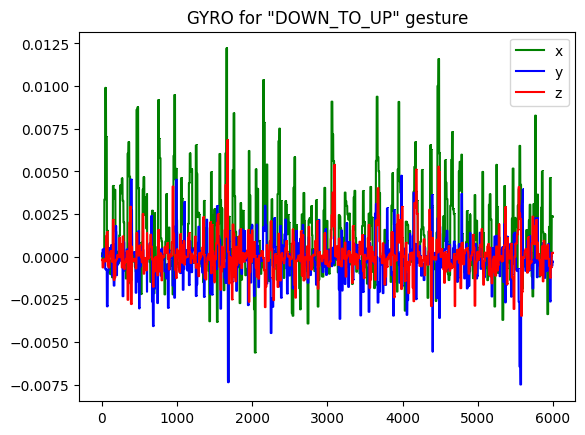

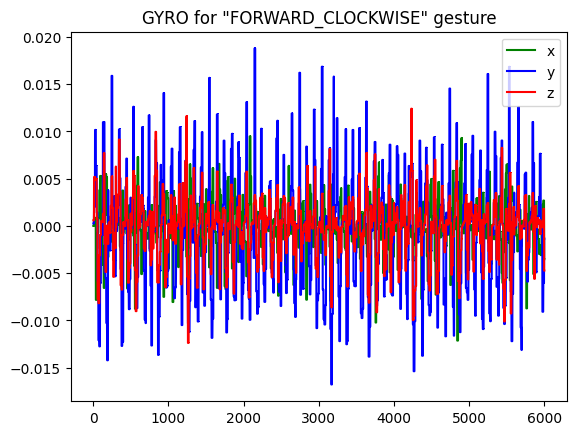

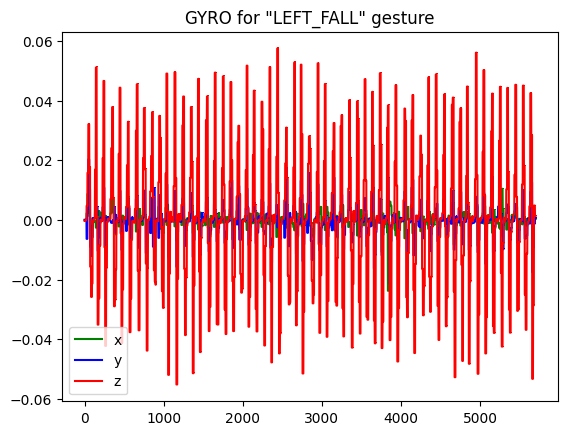

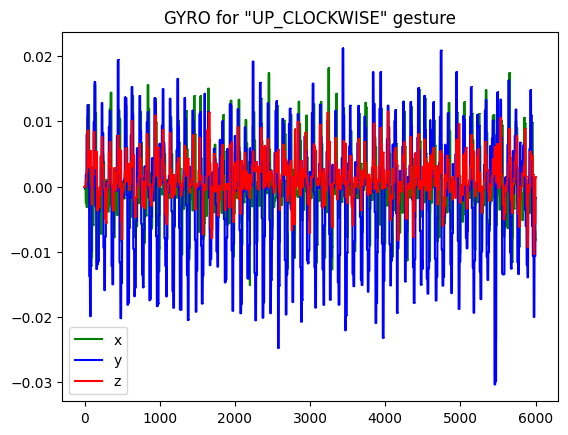

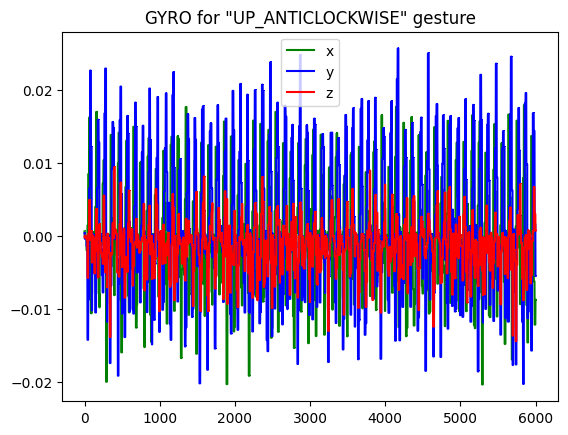

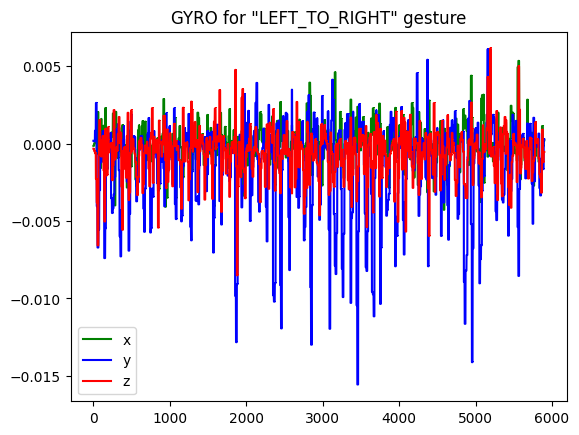

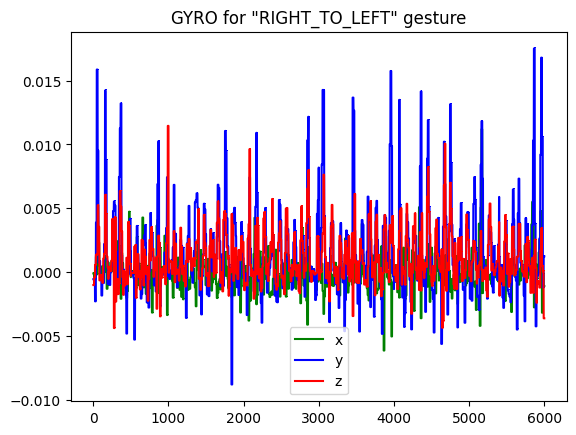

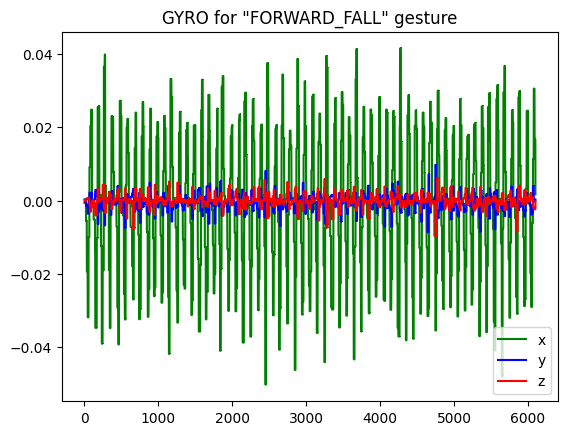

In [49]:
visualize('gyro', gestures)

C:\Users\HP\AppData\Local\Temp\ipykernel_45892\2786093836.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['ax'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\HP\AppData\Local\Temp\ipykernel_45892\2786093836.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['ay'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\HP\AppData\Local\Temp\ipykernel_45892\2786093836.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['az'], 'r.', label='z', linestyle='solid', marker=',')


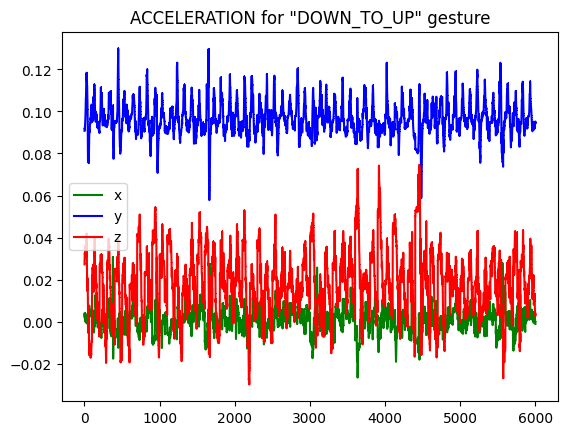

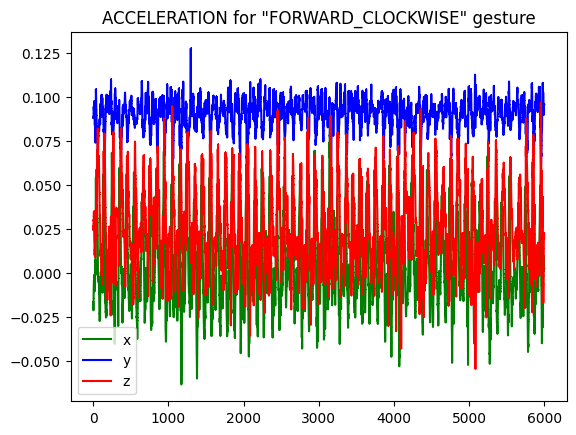

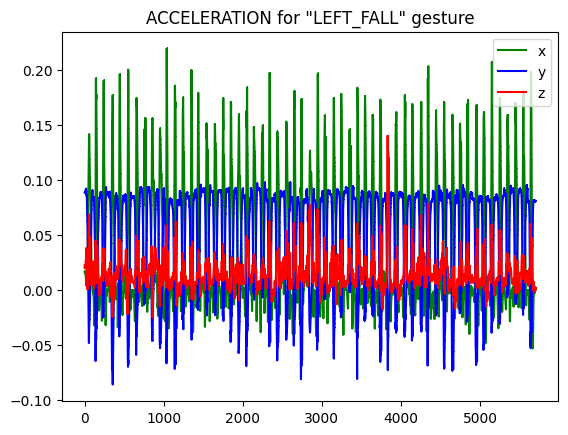

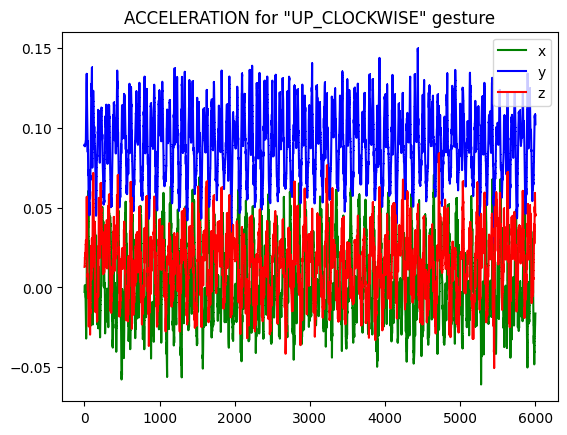

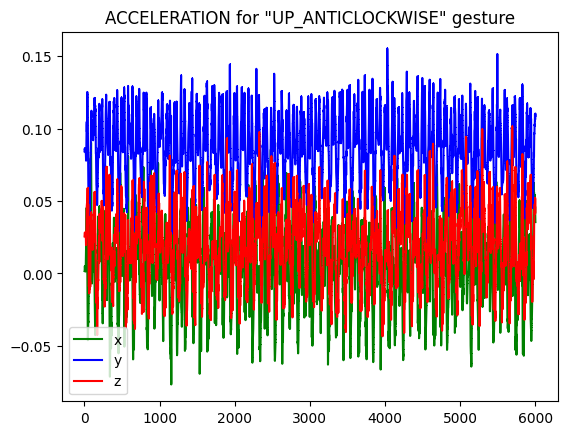

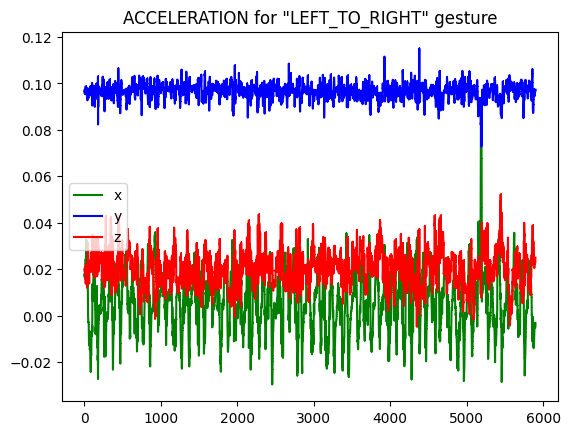

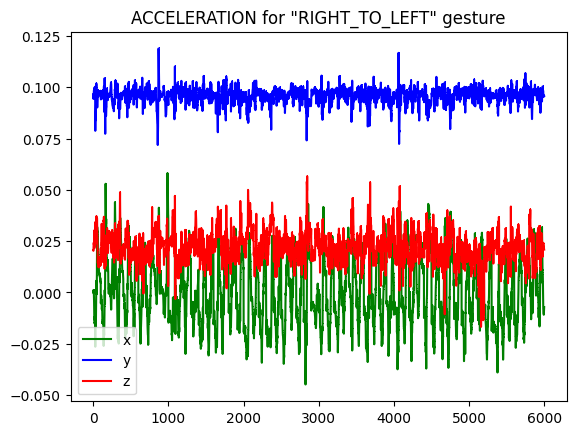

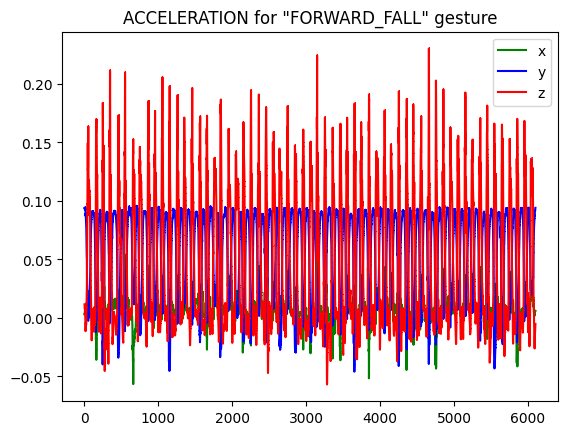

In [50]:
visualize('acceleration', gestures)

Acceleration plot of 'left_to_right' has an outlier.

Identifying and removing it.


In [51]:

outlier = data_dict['left_to_right'][data_dict['left_to_right']['ax'] > 0.06]
print("Outliers:")
print(outlier)

# Get unique indices of the outliers
outlier_index = outlier.index.unique().values
print("Outlier indices:", outlier_index)

# Ensure indices are aligned
common_indices = df.index.intersection(outlier_index)
if len(common_indices) == 0:
    print("No common indices found. Ensure indices are aligned.")
else:
    # Drop rows with the outlier indices and reset the DataFrame index
    df = df.drop(common_indices).reset_index(drop=True)
    print("Updated DataFrame:")
    print(df)


Outliers:
            ax        ay        az        gx        gy        gz
5184  0.061794  0.082124  0.010391  0.000595  0.000707 -0.000647
5185  0.073243  0.082884  0.017196  0.000595  0.000707 -0.000647
5186  0.086864  0.083204  0.017766  0.000595  0.000707 -0.000647
5187  0.085522  0.082052  0.012932  0.000595  0.000707 -0.000647
5188  0.085581  0.077136  0.009168  0.000595  0.000707 -0.000647
5189  0.085581  0.077136  0.009168 -0.000697 -0.000800  0.006152
5190  0.088123  0.084677  0.007743 -0.000697 -0.000800  0.006152
5191  0.084608  0.080722  0.012517 -0.000697 -0.000800  0.006152
5192  0.080439  0.075770  0.015783 -0.000697 -0.000800  0.006152
5193  0.079596  0.072789  0.021483 -0.000697 -0.000800  0.006152
5194  0.078682  0.078228  0.029547 -0.000697 -0.000800  0.006152
5195  0.067530  0.080188  0.034677 -0.000697 -0.000800  0.006152
Outlier indices: [5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195]
No common indices found. Ensure indices are aligned.


In [52]:
df

,1,2,3,4,5,6,7,8,9,10,...,592,593,594,595,596,597,598,599,600,Gesture
0,0.003022,0.093937,0.011679,-0.000629,0.000282,-0.000210,0.002838,0.093238,0.010267,-0.000629,...,0.024808,0.002097,-0.001888,0.000016,0.090347,-0.011931,0.024808,0.002097,-0.001888,forward_fall
1,0.000798,0.096556,0.020467,-0.000109,-0.000561,-0.001020,0.000401,0.095487,0.020298,-0.000109,...,0.000335,-0.000426,-0.000641,0.004812,0.097926,0.013797,0.000335,-0.000426,-0.000641,right_to_left
2,0.002546,0.090785,0.027262,0.000192,0.000018,-0.000177,0.004073,0.091596,0.029648,0.000192,...,0.000269,0.000499,-0.000634,0.003202,0.099697,-0.008268,-0.000968,-0.000035,-0.000430,down_to_up
3,0.017293,0.095955,0.019115,-0.000139,0.000187,-0.000324,0.017862,0.096802,0.019986,-0.000139,...,-0.001582,0.000178,-0.000643,-0.007194,0.099899,0.022321,-0.001582,0.000178,-0.000643,left_to_right
4,-0.000055,0.095312,0.020812,-0.000233,0.000047,0.000046,-0.000883,0.095468,0.022240,-0.000233,...,0.000294,-0.001089,-0.000150,-0.000919,0.089743,-0.005857,0.000294,-0.001089,-0.000150,down_to_up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0.012845,0.098365,0.013678,-0.000165,-0.000197,0.000305,0.012250,0.099106,0.013836,-0.000165,...,0.000217,0.000280,-0.000531,-0.003093,0.097247,0.024952,0.000217,0.000280,-0.000531,left_to_right
473,-0.002079,0.080596,0.006062,0.000606,0.000420,-0.000667,-0.002528,0.080146,0.005661,0.000606,...,0.000380,0.000523,0.001311,0.000933,0.080889,0.000381,0.000380,0.000523,0.001311,left_fall
474,0.011863,0.095148,0.028367,-0.000533,-0.000350,-0.000925,0.011118,0.095004,0.028283,-0.000533,...,-0.001097,0.001230,-0.003628,-0.007168,0.095688,0.020857,-0.001097,0.001230,-0.003628,right_to_left
475,0.007047,0.093727,0.008762,0.000426,0.000409,-0.000170,0.006576,0.094048,0.008969,0.000426,...,0.016682,-0.000295,-0.002204,0.006072,0.094140,-0.005092,0.001702,0.000295,-0.000190,forward_fall


In [53]:
df.to_csv('gesture60_8_normalized.csv', index = False)

In [54]:
y_df = pd.get_dummies(df.Gesture)[gestures]
print(y_df)
print(np.array(y_df)[0].shape)

     down_to_up  forward_clockwise  left_fall  up_clockwise  up_anticlockwise  \
0         False              False      False         False             False   
1         False              False      False         False             False   
2          True              False      False         False             False   
3         False              False      False         False             False   
4          True              False      False         False             False   
..          ...                ...        ...           ...               ...   
472       False              False      False         False             False   
473       False              False       True         False             False   
474       False              False      False         False             False   
475       False              False      False         False             False   
476       False               True      False         False             False   

     left_to_right  right_t

In [55]:
df = pd.concat([df, y_df], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,600,Gesture,down_to_up,forward_clockwise,left_fall,up_clockwise,up_anticlockwise,left_to_right,right_to_left,forward_fall
0,0.003022,0.093937,0.011679,-0.000629,0.000282,-0.000210,0.002838,0.093238,0.010267,-0.000629,...,-0.001888,forward_fall,False,False,False,False,False,False,False,True
1,0.000798,0.096556,0.020467,-0.000109,-0.000561,-0.001020,0.000401,0.095487,0.020298,-0.000109,...,-0.000641,right_to_left,False,False,False,False,False,False,True,False
2,0.002546,0.090785,0.027262,0.000192,0.000018,-0.000177,0.004073,0.091596,0.029648,0.000192,...,-0.000430,down_to_up,True,False,False,False,False,False,False,False
3,0.017293,0.095955,0.019115,-0.000139,0.000187,-0.000324,0.017862,0.096802,0.019986,-0.000139,...,-0.000643,left_to_right,False,False,False,False,False,True,False,False
4,-0.000055,0.095312,0.020812,-0.000233,0.000047,0.000046,-0.000883,0.095468,0.022240,-0.000233,...,-0.000150,down_to_up,True,False,False,False,False,False,False,False


In [56]:
train_count = int(0.8*len(df))
test_count = len(df) - train_count
print(train_count, test_count)

x_train, y_train = np.array(df)[:train_count, :600].astype('float32'), np.array(df)[:train_count, -(len(gestures)):].astype('int64')
x_test, y_test = np.array(df)[train_count:, :600].astype('float32'), np.array(df)[train_count:, -(len(gestures)):].astype('int64')

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

381 96
(381, 600) (381, 8) (96, 600) (96, 8)


In [57]:
x_train[0].shape

(600,)

# Model

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation="relu", input_shape = (600,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(len(gestures), activation="softmax"))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │       307,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 382,152 (1.46 MB)

 Trainable params: 382,152 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [61]:
model.fit(x_train, y_train, epochs = 16, batch_size = 8)

Epoch 1/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4254 - loss: 1.7673
Epoch 2/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9012 - loss: 0.5016
Epoch 3/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9706 - loss: 0.1420
Epoch 4/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9979 - loss: 0.0453
Epoch 5/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9990 - loss: 0.0386
Epoch 6/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9962 - loss: 0.0243
Epoch 7/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9972 - loss: 0.0247
Epoch 8/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0103
Epoch 9/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0050
Epoch 10/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0038
Epoch 11/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0033
Epoch 12/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - 

In [62]:
model.evaluate(x_test, y_test)
model.save('gesture_model1.h5')
print("size of the model:", os.path.getsize('gesture_model1.h5') / (1024 ), "KB")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9688 - loss: 0.3003 


size of the model: 4514.359375 KB


In [63]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(600,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(gestures), activation="softmax")
])
model2.summary()
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model2.fit(x_train, y_train, epochs = 16, batch_size = 8 , validation_data=(x_test, y_test) )
model2.evaluate(x_test, y_test)
# modle save
model2.save('gesture_model.h5')
print("size of the model:", os.path.getsize('gesture_model.h5') / (1024 ), "KB")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │        76,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,704 (334.78 KB)

 Trainable params: 85,704 (334.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3812 - loss: 1.9903 - val_accuracy: 0.6562 - val_loss: 1.4938
Epoch 2/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7004 - loss: 1.3201 - val_accuracy: 0.9271 - val_loss: 0.7410
Epoch 3/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9004 - loss: 0.6471 - val_accuracy: 0.9375 - val_loss: 0.4341
Epoch 4/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9699 - loss: 0.3415 - val_accuracy: 0.9375 - val_loss: 0.3049
Epoch 5/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9785 - loss: 0.2285 - val_accuracy: 0.9375 - val_loss: 0.2402
Epoch 6/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9924 - loss: 0.1359 - val_accuracy: 0.9583 - val_loss: 0.2283
Epoch 7/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9970 - loss: 0.0904 - val_accuracy: 0.9583 - val_loss: 0.2052
Epoch 8/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9975 - loss: 0.0535 - val_accuracy: 0.9479 - val_

size of the model: 1031.1484375 KB


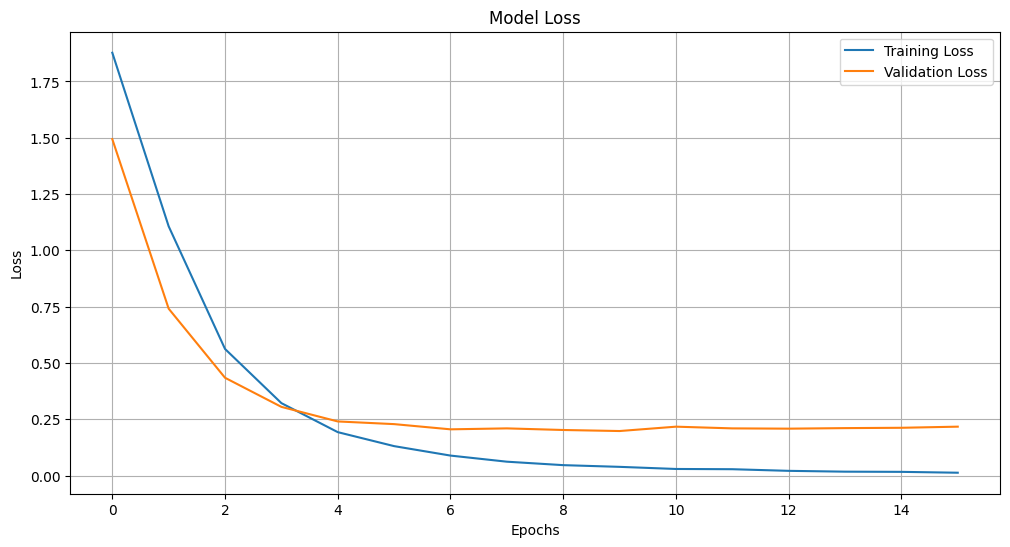

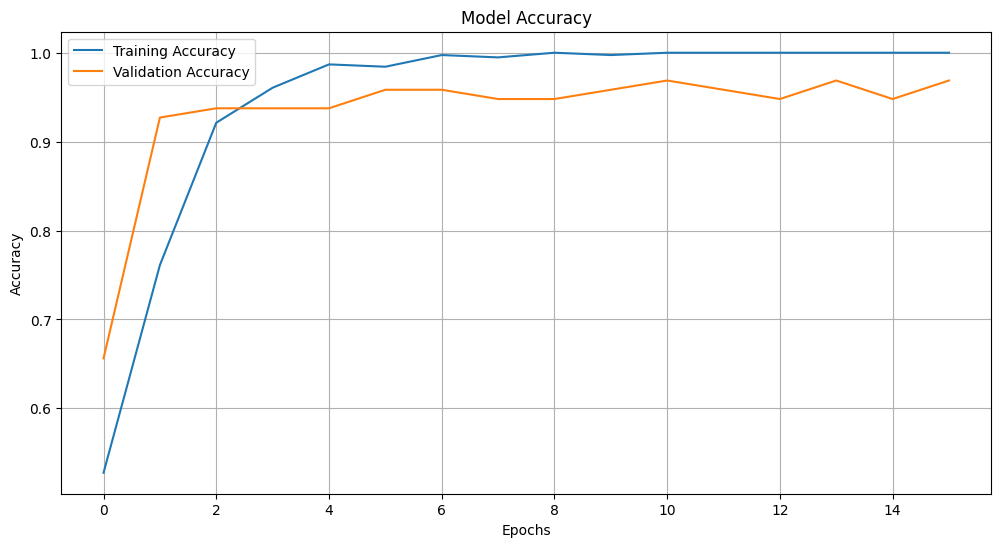

In [64]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [65]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(600,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(gestures), activation="softmax")
])
model3.summary()
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    patience=5,              # Stop training if no improvement for 5 epochs
    restore_best_weights=True,  # Restore the best weights at the end of training
    verbose=1                # Print information when training stops
)

model_checkpoint = ModelCheckpoint(
    'best_gesture_model.h5',  
    monitor='val_accuracy',   
    save_best_only=True,      
    verbose=1                 
)

# Train the model with callbacks
history = model3.fit(
    x_train, y_train,
    epochs=16,              
    batch_size=8,           
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint] 
)

# Evaluate the model
model3.evaluate(x_test, y_test)

# Save the final model (if needed)
model3.save('gesture_model_3.h5')
print("size of the model:", os.path.getsize('gesture_model_3.h5') / (1024 ), "KB")


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 128)            │        76,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,704 (334.78 KB)

 Trainable params: 85,704 (334.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3591 - loss: 1.9861
Epoch 1: val_accuracy improved from -inf to 0.63542, saving model to best_gesture_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.3644 - loss: 1.9806 - val_accuracy: 0.6354 - val_loss: 1.4618
Epoch 2/16
38/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8128 - loss: 1.2099
Epoch 2: val_accuracy improved from 0.63542 to 0.90625, saving model to best_gesture_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8196 - loss: 1.1714 - val_accuracy: 0.9062 - val_loss: 0.6385
Epoch 3/16
43/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9387 - loss: 0.5559
Epoch 3: val_accuracy improved from 0.90625 to 0.93750, saving model to best_gesture_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9419 - loss: 0.5440 - val_accuracy: 0.9375 - val_loss: 0.3705
Epoch 4/16
39/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - loss: 0.2635
Epoch 4: val_accuracy improved from 0.93750 to 0.94792, saving model to best_gesture_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9901 - loss: 0.2590 - val_accuracy: 0.9479 - val_loss: 0.2722
Epoch 5/16
43/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9974 - loss: 0.1648
Epoch 5: val_accuracy did not improve from 0.94792
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9961 - loss: 0.1627 - val_accuracy: 0.9479 - val_loss: 0.2342
Epoch 6/16
44/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9954 - loss: 0.1115
Epoch 6: val_accuracy did not improve from 0.94792
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9953 - loss: 0.1104 - val_accuracy: 0.9271 - val_loss: 0.2248
Epoch 7/16
42/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0817
Epoch 7: val_accuracy did not improve from 0.94792
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0794 - val_accuracy: 0.9375 - val_loss: 0.2205
Epoch 8/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9982 - loss: 0.0548
Epoch 8: val_accuracy improved from 0.94792 to 

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9980 - loss: 0.0550 - val_accuracy: 0.9583 - val_loss: 0.2051
Epoch 9/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9935 - loss: 0.0577
Epoch 9: val_accuracy did not improve from 0.95833
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9935 - loss: 0.0576 - val_accuracy: 0.9271 - val_loss: 0.2294
Epoch 10/16
43/48 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0351
Epoch 10: val_accuracy did not improve from 0.95833
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0349 - val_accuracy: 0.9583 - val_loss: 0.2067
Epoch 11/16
43/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0206
Epoch 11: val_accuracy did not improve from 0.95833
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0214 - val_accuracy: 0.9271 - val_loss: 0.2240
Epoch 12/16
43/48 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0224
Epoch 12: val_accuracy did not improve 

size of the model: 1031.1484375 KB


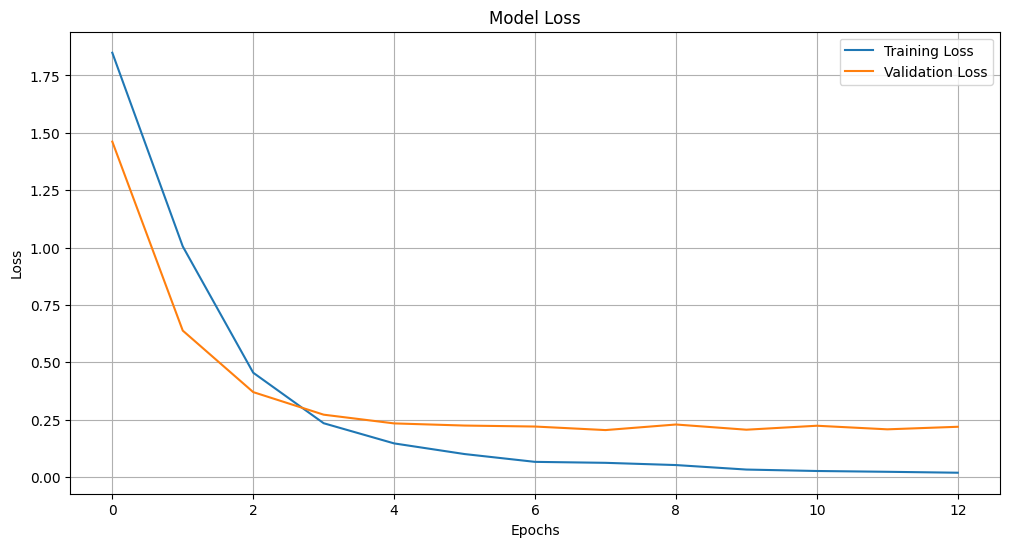

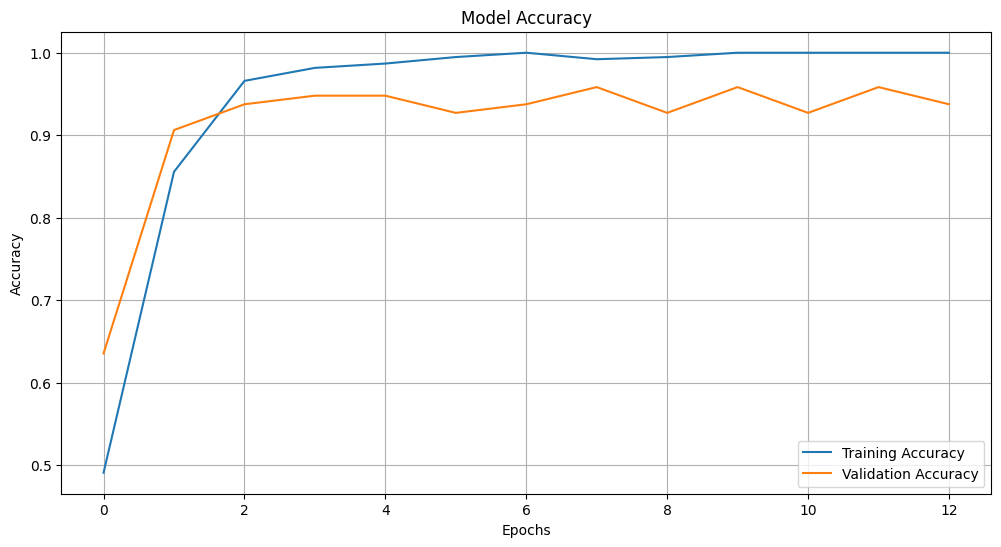

In [66]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [67]:
# import tensorflow as tf
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# # Define the model creation function
# def create_model(optimizer='adam', units1=128, units2=64):
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Dense(units1, activation="relu", input_shape=(600,)),
#         tf.keras.layers.Dense(units2, activation="relu"),
#         tf.keras.layers.Dense(len(gestures), activation="softmax")
#     ])
    
#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Wrap the model using KerasClassifier
# model = KerasClassifier(build_fn=create_model, verbose=0)

# # Define the parameter grid for RandomizedSearchCV
# param_dist = {
#     'optimizer': ['adam', 'sgd', 'rmsprop'],
#     'units1': [64, 128, 256],
#     'units2': [32, 64, 128],
#     'batch_size': [32, 64],
#     'epochs': [10, 20, 30]
# }

# # Create the RandomizedSearchCV object
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2)

# # Fit the model to your data (replace X_train and y_train with your actual data)
# random_search.fit(X_train, y_train)

# # Get the best hyperparameters and model
# print(f"Best Hyperparameters: {random_search.best_params_}")
# best_model = random_search.best_estimator_

# # Evaluate the best model on test data (replace X_test and y_test with your actual data)
# score = best_model.score(X_test, y_test)
# print(f"Test Accuracy: {score}")


# Tiny model

In [68]:
converter = tf.lite.TFLiteConverter.from_keras_model(model3)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
print(f"Converted model size: {len(tflite_model) / 1024:.2f} KB")
#  with converter.optimizations = [tf.lite.Optimize.DEFAULT] the model size is 88.02 kb KB
# without any optimization the model size is 336.89 KB



INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpfaeao2gf\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpfaeao2gf\assets


Saved artifact at 'C:\Users\HP\AppData\Local\Temp\tmpfaeao2gf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 600), dtype=tf.float32, name='keras_tensor_34')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  2550142806992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2550142807184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2550072735120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2550072732240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2550170768144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2550170763536: TensorSpec(shape=(), dtype=tf.resource, name=None)
Converted model size: 90.16 KB


In [69]:
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


In [70]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()


In [71]:
import numpy as np
from sklearn.metrics import accuracy_score

# Function to get confidence levels and calculate true positive and false positive metrics
def evaluate_model_with_metrics(interpreter, x_test, y_test, gestures):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    predictions = []

    for i in range(len(x_test)):
        input_data = x_test[i:i+1].astype("float32")
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        predictions.append(np.argmax(output_data))

    y_test_classes = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_classes, predictions)

    # Initialize arrays to store TP, FP, TN, FN
    true_positives = np.zeros(len(gestures))
    false_positives = np.zeros(len(gestures))
    true_negatives = np.zeros(len(gestures))
    false_negatives = np.zeros(len(gestures))

    # Calculate TP, FP, TN, FN for each gesture
    for i in range(len(gestures)):
        true_positives[i] = np.sum((y_test_classes == i) & (np.array(predictions) == i))
        false_positives[i] = np.sum((y_test_classes != i) & (np.array(predictions) == i))
        true_negatives[i] = np.sum((y_test_classes != i) & (np.array(predictions) != i))
        false_negatives[i] = np.sum((y_test_classes == i) & (np.array(predictions) != i))

    # Calculate Precision, Recall, and F1-Score for each class
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Calculate average metrics (macro-averaged)
    avg_precision = np.mean(precision)
    avg_recall = np.mean(recall)
    avg_f1_score = np.mean(f1_score)

    return accuracy, precision, recall, f1_score, avg_precision, avg_recall, avg_f1_score

# Example usage: Evaluate the TensorFlow Lite model
accuracy, precision, recall, f1_score, avg_precision, avg_recall, avg_f1_score = evaluate_model_with_metrics(interpreter, x_test, y_test, gestures)

# Print the metrics
print(f"TensorFlow Lite model accuracy: {accuracy * 100:.2f}%")
print("Precision for each gesture:", precision)
print("Recall for each gesture:", recall)
print("F1 Score for each gesture:", f1_score)
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")
print(f"Average F1 Score: {avg_f1_score:.2f}")


TensorFlow Lite model accuracy: 95.83%
Precision for each gesture: [0.84615385 1.         1.         1.         1.         0.91666667
 0.90909091 1.        ]
Recall for each gesture: [1.         1.         1.         0.81818182 1.         0.84615385
 1.         1.        ]
F1 Score for each gesture: [0.91666667 1.         1.         0.9        1.         0.88
 0.95238095 1.        ]
Average Precision: 0.96
Average Recall: 0.96
Average F1 Score: 0.96
